In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv("D:/abhinav/data/hear_disease/heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot: >

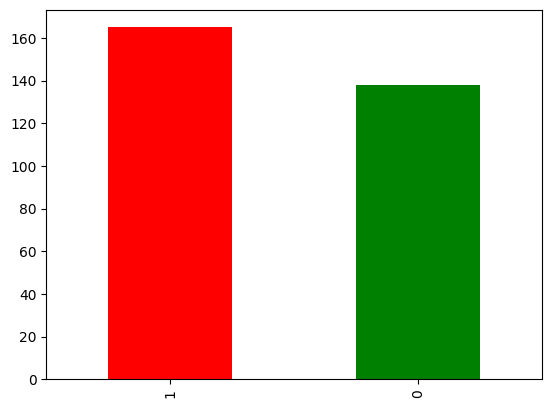

In [4]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart disease based on sex

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


  ## Age vs Max heart rate

Text(0, 0.5, 'Max Heart Rate')

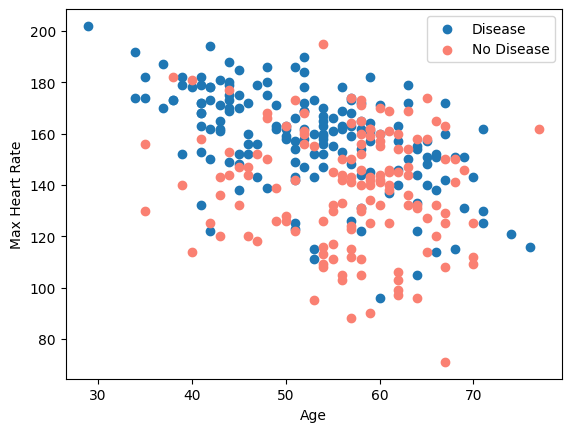

In [8]:
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='salmon')
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

<AxesSubplot: ylabel='Frequency'>

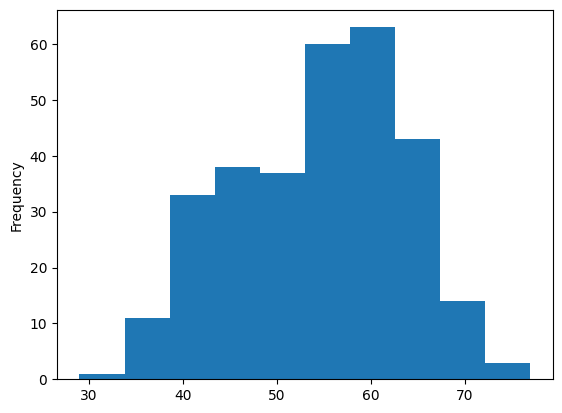

In [9]:
df.age.plot.hist()

### cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

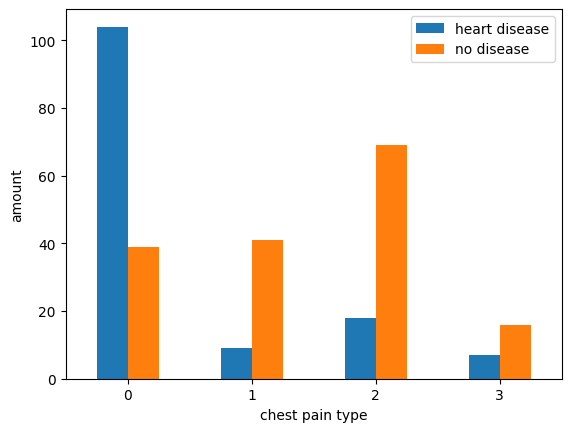

In [10]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.xticks(rotation=0)
plt.legend(["heart disease","no disease"])

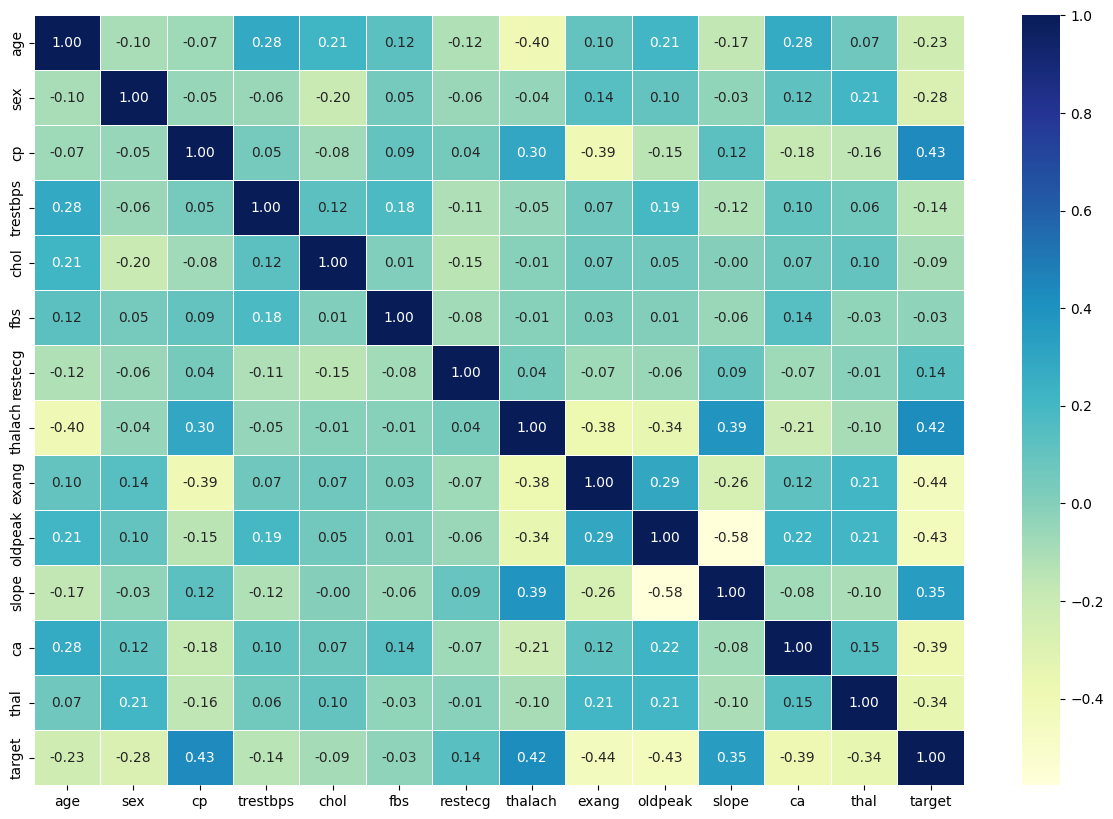

In [11]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")


In [12]:
X=df.drop("target",axis=1)
y=df["target"]

In [13]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

    Three models will be made
    1.logistic regression
    2.random forest
    3.K Nearest Neigbhour

In [14]:
    #creating a function to fit and evaluate  differrent models
    models={"Logistic Regression": LogisticRegression(),"KNN":KNeighborsClassifier()
           ,"Random Forest":RandomForestClassifier()}
    
    def fit_and_score(models,X_train,X_test,y_train,y_test):
        #make a dictionary to keep scores
        np.random.seed(42)
        model_scores={}
        
        for name,model in models.items():
            model.fit(X_train,y_train)
         
        #evaluate the model and append it to model_scores
            model_scores[name]=model.score(X_test,y_test)
        return model_scores
        

In [15]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=
                          y_train,y_test=y_test)

model_scores

C:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyper parameter tuning for KNN

In [16]:
    train_scores=[]
    test_scores=[]
    knn=KNeighborsClassifier()
    neighbors=range(1,21)
    for i in neighbors:
        knn.set_params(n_neighbors=i)
        knn.fit(X_train,y_train)
        train_scores.append(knn.score(X_train,y_train))
        test_scores.append(knn.score(X_test,y_test))
    

In [17]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [18]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

10

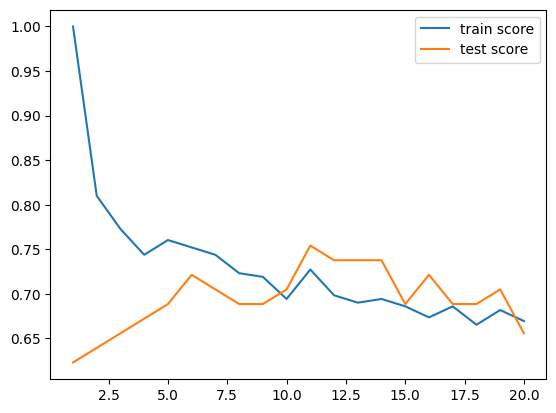

In [19]:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_scores,label='test score')
plt.legend()
np.argmax(test_scores)


In [20]:
test_scores[11]*100
#will be the maximum value

73.77049180327869

## Hyper parameter tuning with randomizedsearchcv

In [21]:
#create a hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}

In [22]:
rf_grid={"n_estimators":np.arange(10,1000,50),
       "max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}       #arrange creates a list from 10 to 1000 with spaces of 50

In [23]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                             cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [26]:
np.random.seed()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=
                          rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [28]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 5}

### hyperparameter tuninig with grid searchcv`

In [29]:
# since Logististic regression had best score grid search cv will be done 
# on logistic regression

In [30]:
#create a hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,
                       cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [33]:
y_preds=gs_log_reg.predict(X_test)

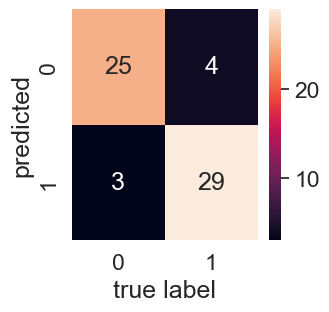

In [34]:
#confusion matrix
def plot_conf_mat(y_test,y_pred):
    sns.set(font_scale=1.5)
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=True)
    plt.xlabel("true label")
    plt.ylabel("predicted")
plot_conf_mat(y_test,y_preds)

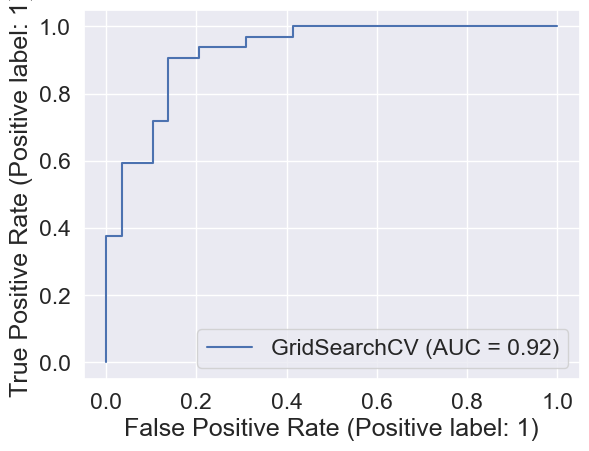

In [35]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test)

In [36]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
#calculate evaluation metrics using cross validaation

In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [40]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [41]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [42]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [43]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [44]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

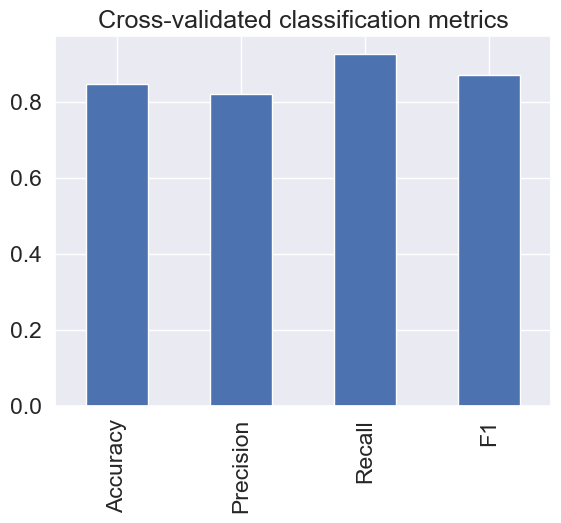

In [45]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);